In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def plot_series(time, series, start =0, end = None, label = None):
    plt.plot(time[start:end], series[start:end], label =label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4 ,np.cos(season_time * 2* np.pi), 1/np.exp(3 * season_time))

def seasonality(time, period, amplitude, phase = 0):
    season_time = ((time + phase)%period) / period
    return amplitude * seasonal_pattern(season_time)

def white_noise(time, noise_level = 1, seed = None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

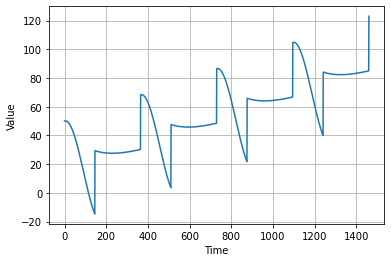

In [31]:
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)


plot_series(time, series)

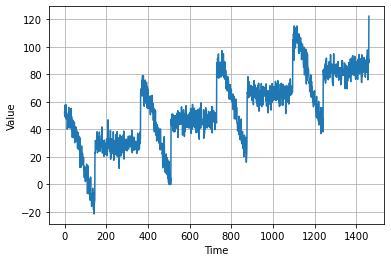

In [32]:
noise_level = 5
noise = white_noise(time, noise_level, seed = 42)

series += noise

plot_series(time, series)

All right, this looks realistic enough for now. Let's try to forecast it. We will split it into two periods: the training period and the validation period (in many cases, you would also want to have a test period). The split will be at time step 1000.

In [33]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

# Naive Forecast

In [34]:
naive_forcast = series[split_time - 1: -1]
print(naive_forcast)

[ 67.19673417  71.34471371  68.98551494  64.67519969  61.15735421
  67.89843149  66.39030291  68.91468503  67.63070049  69.7190049
  61.81174015  71.0918342   65.51008011  74.915873    61.11138224
  73.25515699  65.58317034  61.35506451  62.211521    63.04826468
  66.79013535  67.30303871  61.8401661   64.60694517  75.46036708
  73.40727142  66.97195535  65.00137499  65.43277204  67.92169834
  59.76187207  63.61091006  56.57705977  66.9385108   68.20101574
  62.57196852  72.88092156  58.90546664  57.73594625  66.20382215
  70.34101191  73.54932937  62.85965153  70.57206865  65.01092175
  64.36533348  69.67198015  68.54070825  57.42274772  72.71322451
  72.25699176  62.25493006  67.38816456  67.90589429  66.76590023
  62.73798368  62.1585591   65.41625898  71.4352132   68.3172915
  63.77412404  69.51377508  51.44083364  71.45581837  57.04204055
  63.95719932  60.20002271  59.35410512  71.6609575   63.54779797
  67.64847176  65.71116443  68.36095165  66.39000103  59.62123704
  71.0480000

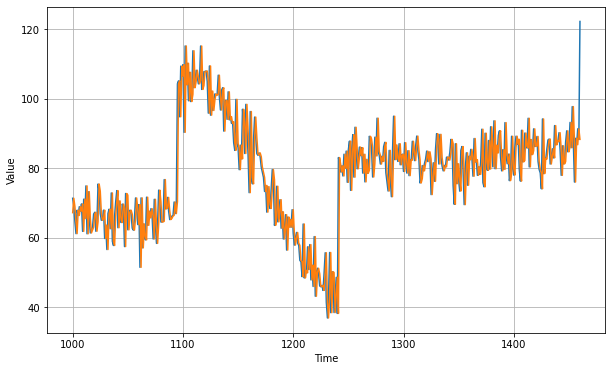

In [35]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forcast, label="Forcast")

Let's zoom in on the start of the validation period:

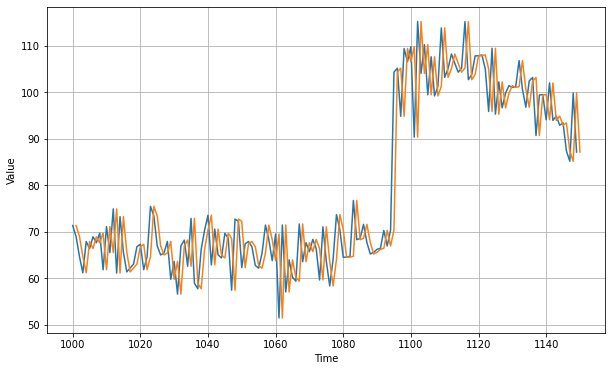

In [37]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150, label="Series")
plot_series(time_valid, naive_forcast, start=1, end=151, label="Forecast")

You can see that the naive forecast lags 1 step behind the time series.

Now let's compute the mean absolute error between the forecasts and the predictions in the validation period:

In [39]:
errors = naive_forcast - x_valid
abs_error = np.abs(errors)
mae = abs_error.mean()
print("MAE: ",mae)

MAE:  5.9379085153216735


That's our baseline, now let's try a moving average.